Question 1: Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm

In [2]:
vehicle_df = pd.read_csv("vehicle.csv")

In [3]:
vehicle_df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
343          102         54.0                 101.0         190.0   
427           86         38.0                  89.0         176.0   
759           94         50.0                  84.0         138.0   
641           84         43.0                  76.0         180.0   
113           88         35.0                  50.0         121.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
343                  58.0                       10          222.0   
427                  59.0                        9          169.0   
759                  57.0                       10          156.0   
641                  75.0                        7          155.0   
113                  58.0                        5          114.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
343           30.0                    25.0                        171   
427           39.0                    20.0                        132   
759           44.0                    20.0                        170   
641           43.0                    19.0                        143   
113           59.0                    17.0                        122   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
343            224.0              728.0                      203.0   
427            190.0              428.0                      148.0   
759            171.0              351.0                      187.0   
641            180.0              359.0                      173.0   
113            132.0              192.0                      138.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
343                         71.0            13.0               6.0   
427                         67.0             7.0              33.0   
759                         77.0             5.0               6.0   
641                         77.0             5.0              12.0   
113                         74.0            21.0               4.0   

     skewness_about.2  hollows_ratio class  
343             189.0            198   car  
427             193.0            202   car  
759             182.0            191   van  
641             185.0            190   bus  
113             182.0            187   car

In [6]:
vehicle_df.shape

(846, 19)

In [8]:
#Many missing values found.
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [12]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [13]:
# Filling null values with the corresponding feature Median

vehicle_df = vehicle_df.fillna(value = vehicle_df.median(),axis = 0)

In [15]:
#Null Values are now treated

vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [16]:
# Distribution after the median imputation

vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

Inference: Data distribution mostly remains the same

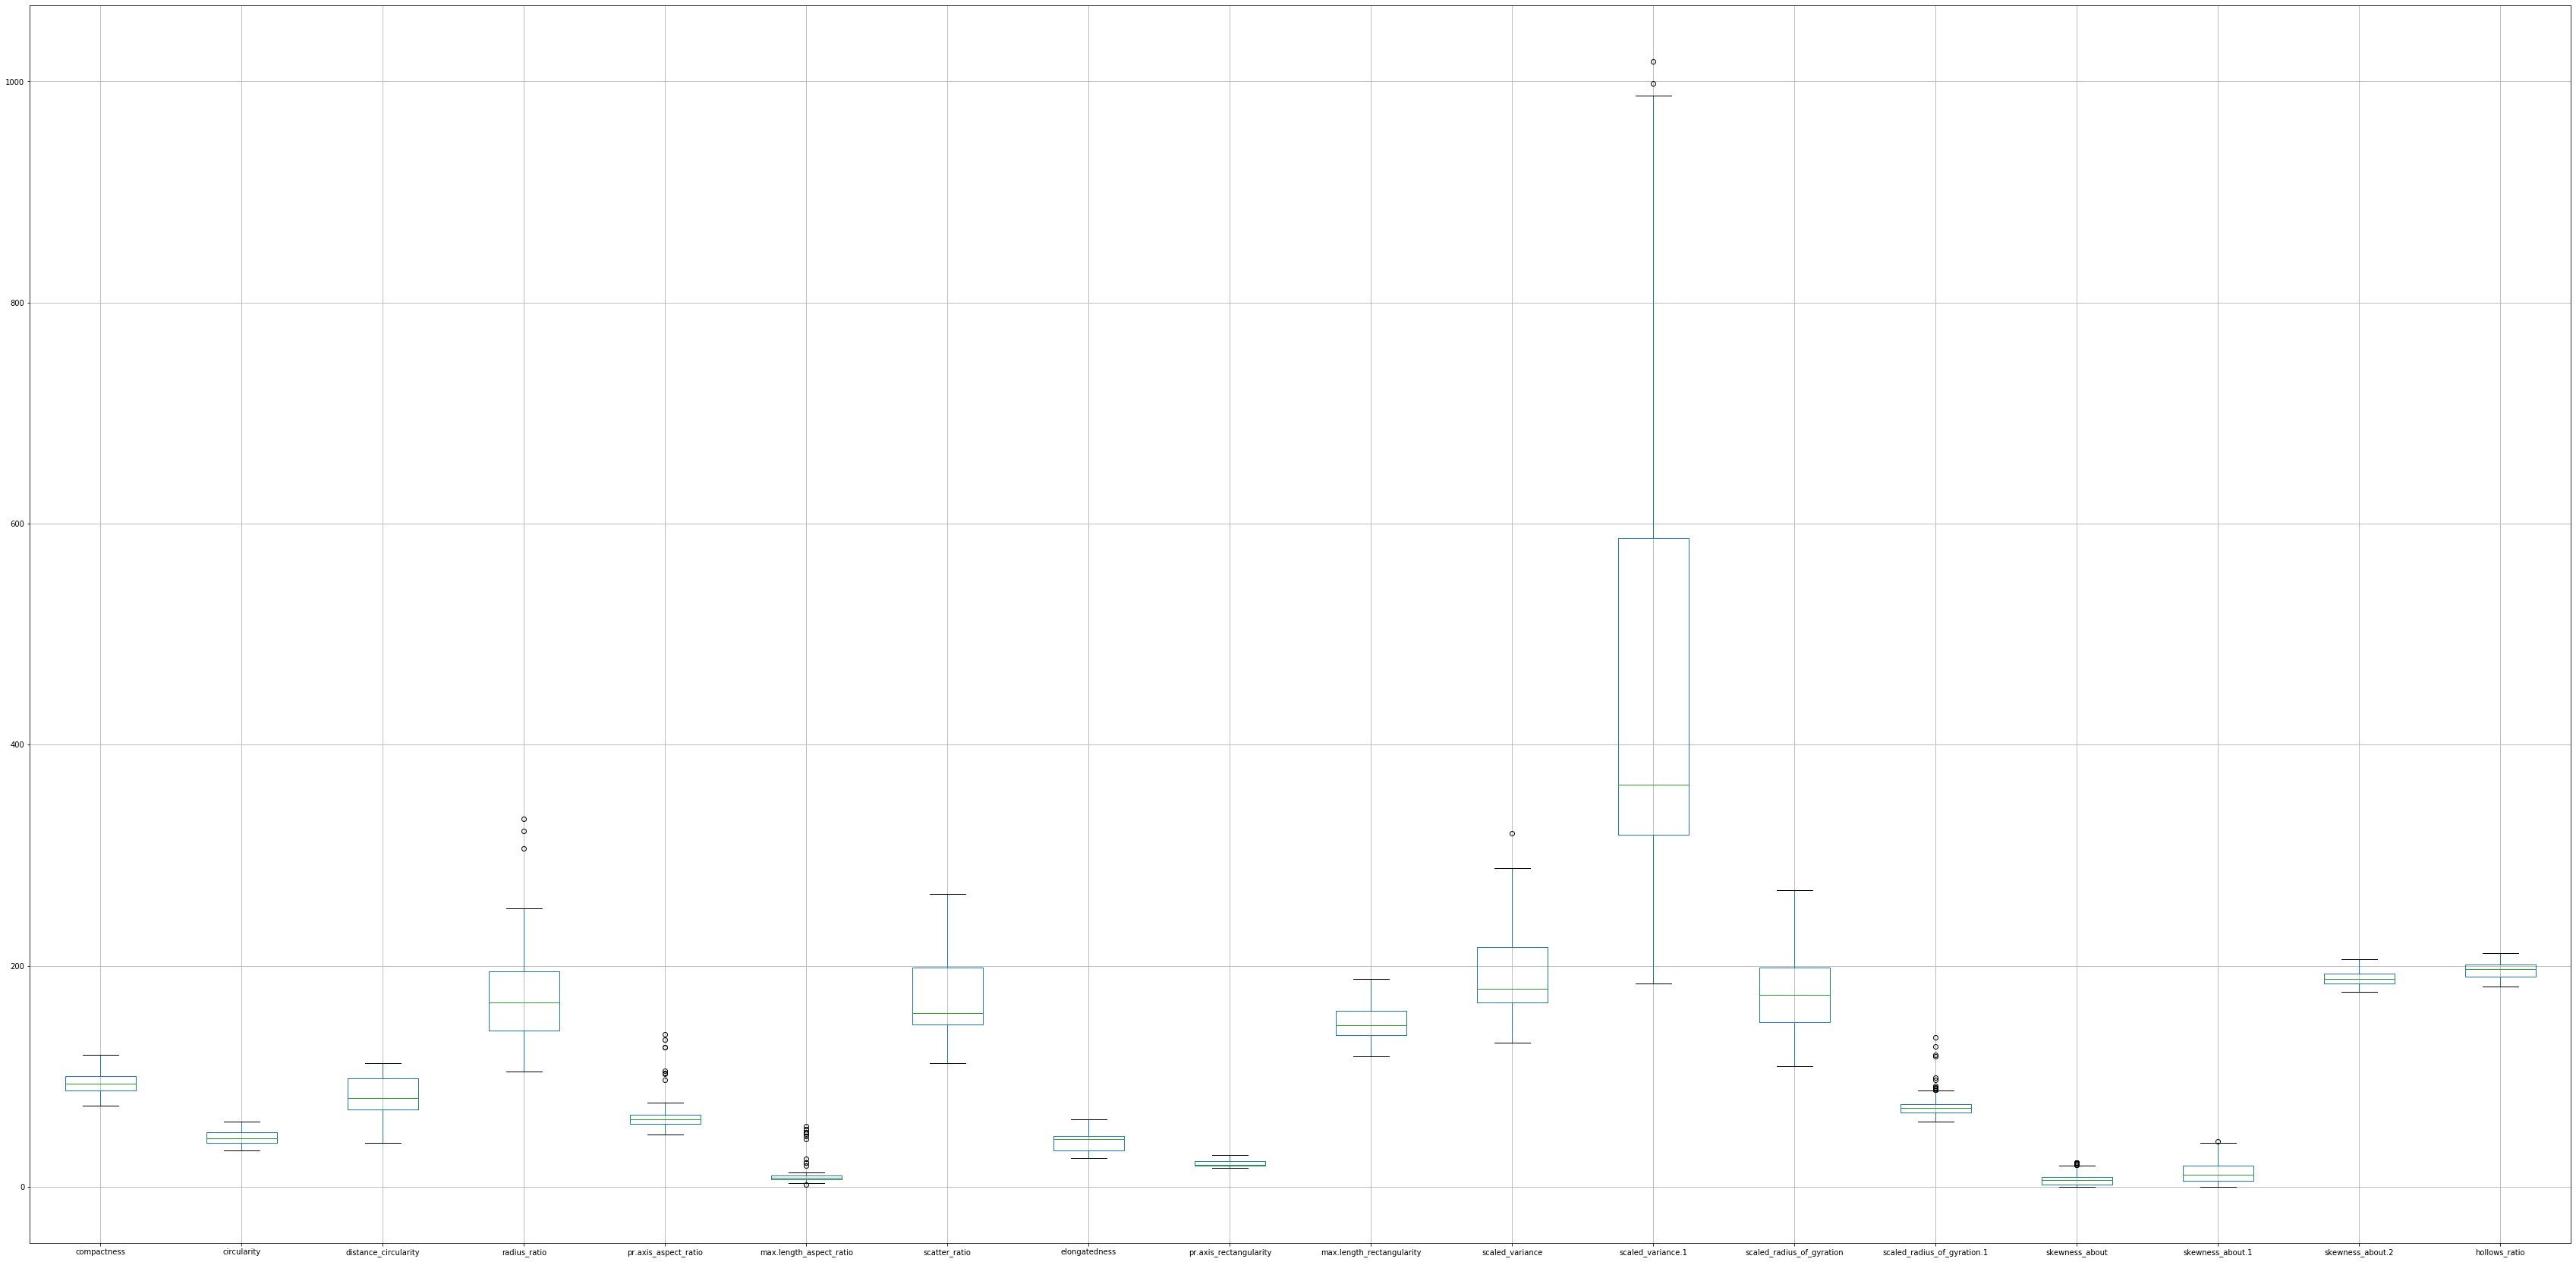

In [19]:
# Checking outliers

vehicle_df.boxplot(figsize=(60, 30)) 

Inference: There are outliers in Radius ratio, pr.axis_aspect_ratio, scaled_variance & max.length_aspect_ratio

In [48]:
# Handling outliers outliers by capping & flooring.  

# handling outlier for scaled_radius_of_gyration.1 feature
s_q3 = vehicle_df["scaled_radius_of_gyration.1"].quantile(0.75)
s_q1 = vehicle_df["scaled_radius_of_gyration.1"].quantile(0.25)
s_iqr = s_q3-s_q1 # find out iqr for scaled_radius_of_gyration.1 feature
print("s_iqr:",s_iqr)
s_upper_cutoff = s_q3+ 1.5*s_iqr
s_lower_cutoff = s_q1-1.5*s_iqr
print("s_upper cutoff:",s_upper_cutoff)
print("s_lower cutoff:",s_lower_cutoff)

#capping outlier at upper cutoff for scaled_radius_of_gyration.1 feature
vehicle_df["scaled_radius_of_gyration.1"] = vehicle_df["scaled_radius_of_gyration.1"].where(vehicle_df["scaled_radius_of_gyration.1"]<s_upper_cutoff,s_upper_cutoff)



s_iqr: 8.0
s_upper cutoff: 87.0
s_lower cutoff: 55.0


In [50]:
# handling outlier for skewness_about feature
sk_q3 = vehicle_df["skewness_about"].quantile(0.75)
sk_q1 = vehicle_df["skewness_about"].quantile(0.25)
sk_iqr = sk_q3-sk_q1 # find out iqr for skewness_about feature
print("sk_iqr:",sk_iqr)
sk_upper_cutoff = sk_q3+ 1.5*sk_iqr
sk_lower_cutoff = sk_q1-1.5*sk_iqr
print("sk_upper cutoff:",sk_upper_cutoff)
print("sk_lower cutoff:",sk_lower_cutoff)

#capping outlier at upper cutoff for skewness_about feature
vehicle_df["skewness_about"] = vehicle_df["skewness_about"].where(vehicle_df["skewness_about"]<sk_upper_cutoff,sk_upper_cutoff)


sk_iqr: 7.0
sk_upper cutoff: 19.5
sk_lower cutoff: -8.5


In [57]:
# handling outlier for max.length_aspect_ratio feature
mr_q3 = vehicle_df["max.length_aspect_ratio"].quantile(0.75)
mr_q1 = vehicle_df["max.length_aspect_ratio"].quantile(0.25)
mr_iqr = mr_q3-mr_q1 # find out iqr for max.length_aspect_ratio feature
print("mr_iqr:",mr_iqr)
mr_upper_cutoff = mr_q3+ 1.5*mr_iqr
mr_lower_cutoff = mr_q1-1.5*mr_iqr
print("mr_upper cutoff:",mr_upper_cutoff)
print("mr_lower cutoff:",mr_lower_cutoff)

#capping outlier at upper cutoff for max.length_aspect_ratio feature
vehicle_df["max.length_aspect_ratio"] = vehicle_df["max.length_aspect_ratio"].where(vehicle_df["max.length_aspect_ratio"]<mr_upper_cutoff,mr_upper_cutoff)

mr_iqr: 3.0
mr_upper cutoff: 14.5
mr_lower cutoff: 2.5


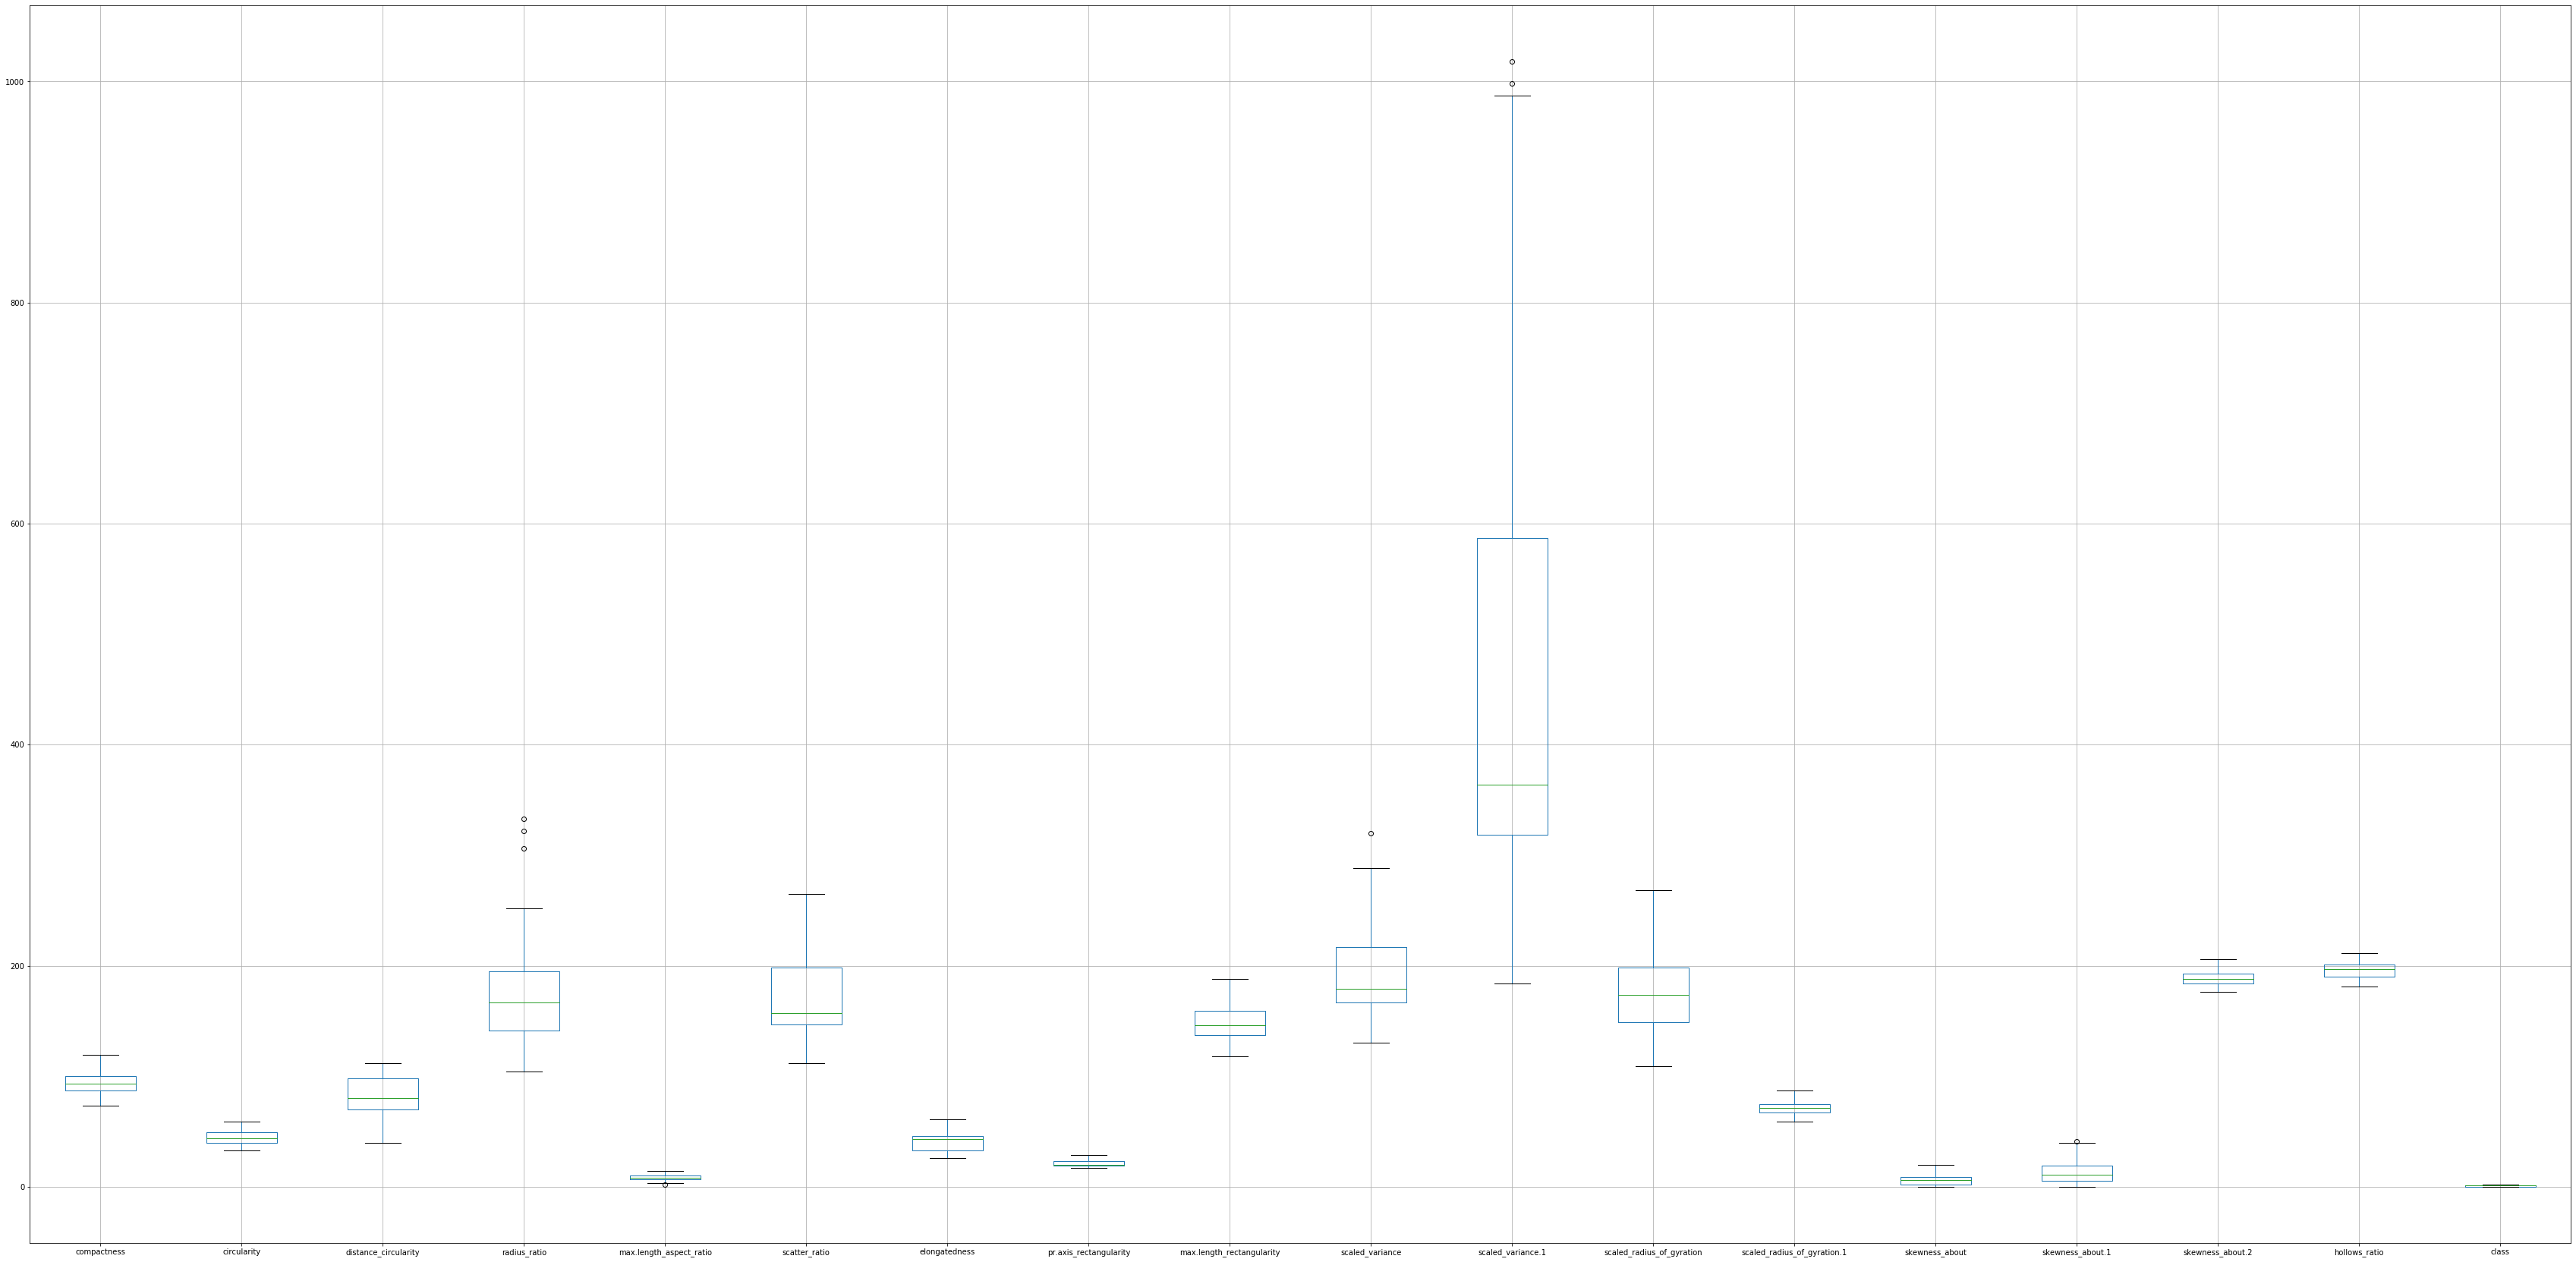

In [59]:
# Checking outliers

vehicle_df.boxplot(figsize=(60, 30)) 

In [60]:
# Question 2: 
# Understanding the attributes - Find relationship between different attributes (Independent variables) and 
# choose carefully which all attributes have to be a part of the analysis and why.

In [62]:
# convert class feature to a numeric variable using label encoding method. 

vehicle_df["class"] = LabelEncoder().fit_transform(vehicle_df["class"]) # converted to numeric values

In [63]:
corr = vehicle_df.corr() # Correlation matrix
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
max.length_aspect_ratio         0.437265     0.524022              0.611365   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.263751     0.056482             -0.247726   
skewness_about                  0.233761     0.144552              0.113352   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  max.length_aspect_ratio  \
compactness                      0.689743                 0.437265   
circularity                      0.620912                 0.524022   
distance_circularity             0.767035                 0.611365   
radius_ratio                     1.000000                 0.501957   
max.length_aspect_ratio          0.501957                 1.000000   
scatter_ratio                    0.734429                 0.439697   
elongatedness                   -0.789481                -0.457058   
pr.axis_rectangularity           0.708385                 0.435037   
max.length_rectangularity        0.568949                 0.608703   
scaled_variance                  0.793415                 0.416973   
scaled_variance.1                0.718436                 0.398307   
scaled_radius_of_gyration        0.536372                 0.374298   
scaled_radius_of_gyration.1     -0.311186                -0.257539   
skewness_about                   0.047118                 0.084540   
skewness_about.1                 0.173741                 0.129515   
skewness_about.2                 0.382214                 0.055799   
hollows_ratio                    0.471309                 0.372214   
class                           -0.182186                 0.336517   

                             scatter_ratio  elongatedness  \
compactness                       0.812620      -0.788750   
circularity                       0.847938      -0.821472   
distance_circularity              0.905076      -0.911307   
radius_ratio                      0.734429      -0.789481   
max.length_aspect_ratio           0.439697      -0.457058   
scatter_ratio                     1.000000      -0.971601   
elongatedness                    -0.971601       1.000000   
pr.axis_rectangularity            0.989751      -0.948996   
max.length_rectangularity         0.809083      -0.775854   
scaled_variance                   0.948662      -0.936382   
scaled_variance.1                 0.993012      -0.953816   
scaled_radius_of_gyration         0.799875      -0.766314   
scaled_radius_of_gyration.1      -0.012569       0.102532   
skewness_about                    0.073986      -0.052501   
skewness_about.1                  0.212428      -0.185053   
skewness_about.2                  0.005628      -0.115126   
hollows_ratio                     0.118817      -0.216905   
class                            -0.288895       0.339344   

                             pr.axis

# Inference :
 
 we observe here a strong multi colinearity across features(indpenedent variables) and another interetsing observation is ,
 mostly none of the indpendent variables are strong predictors of target variable.


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


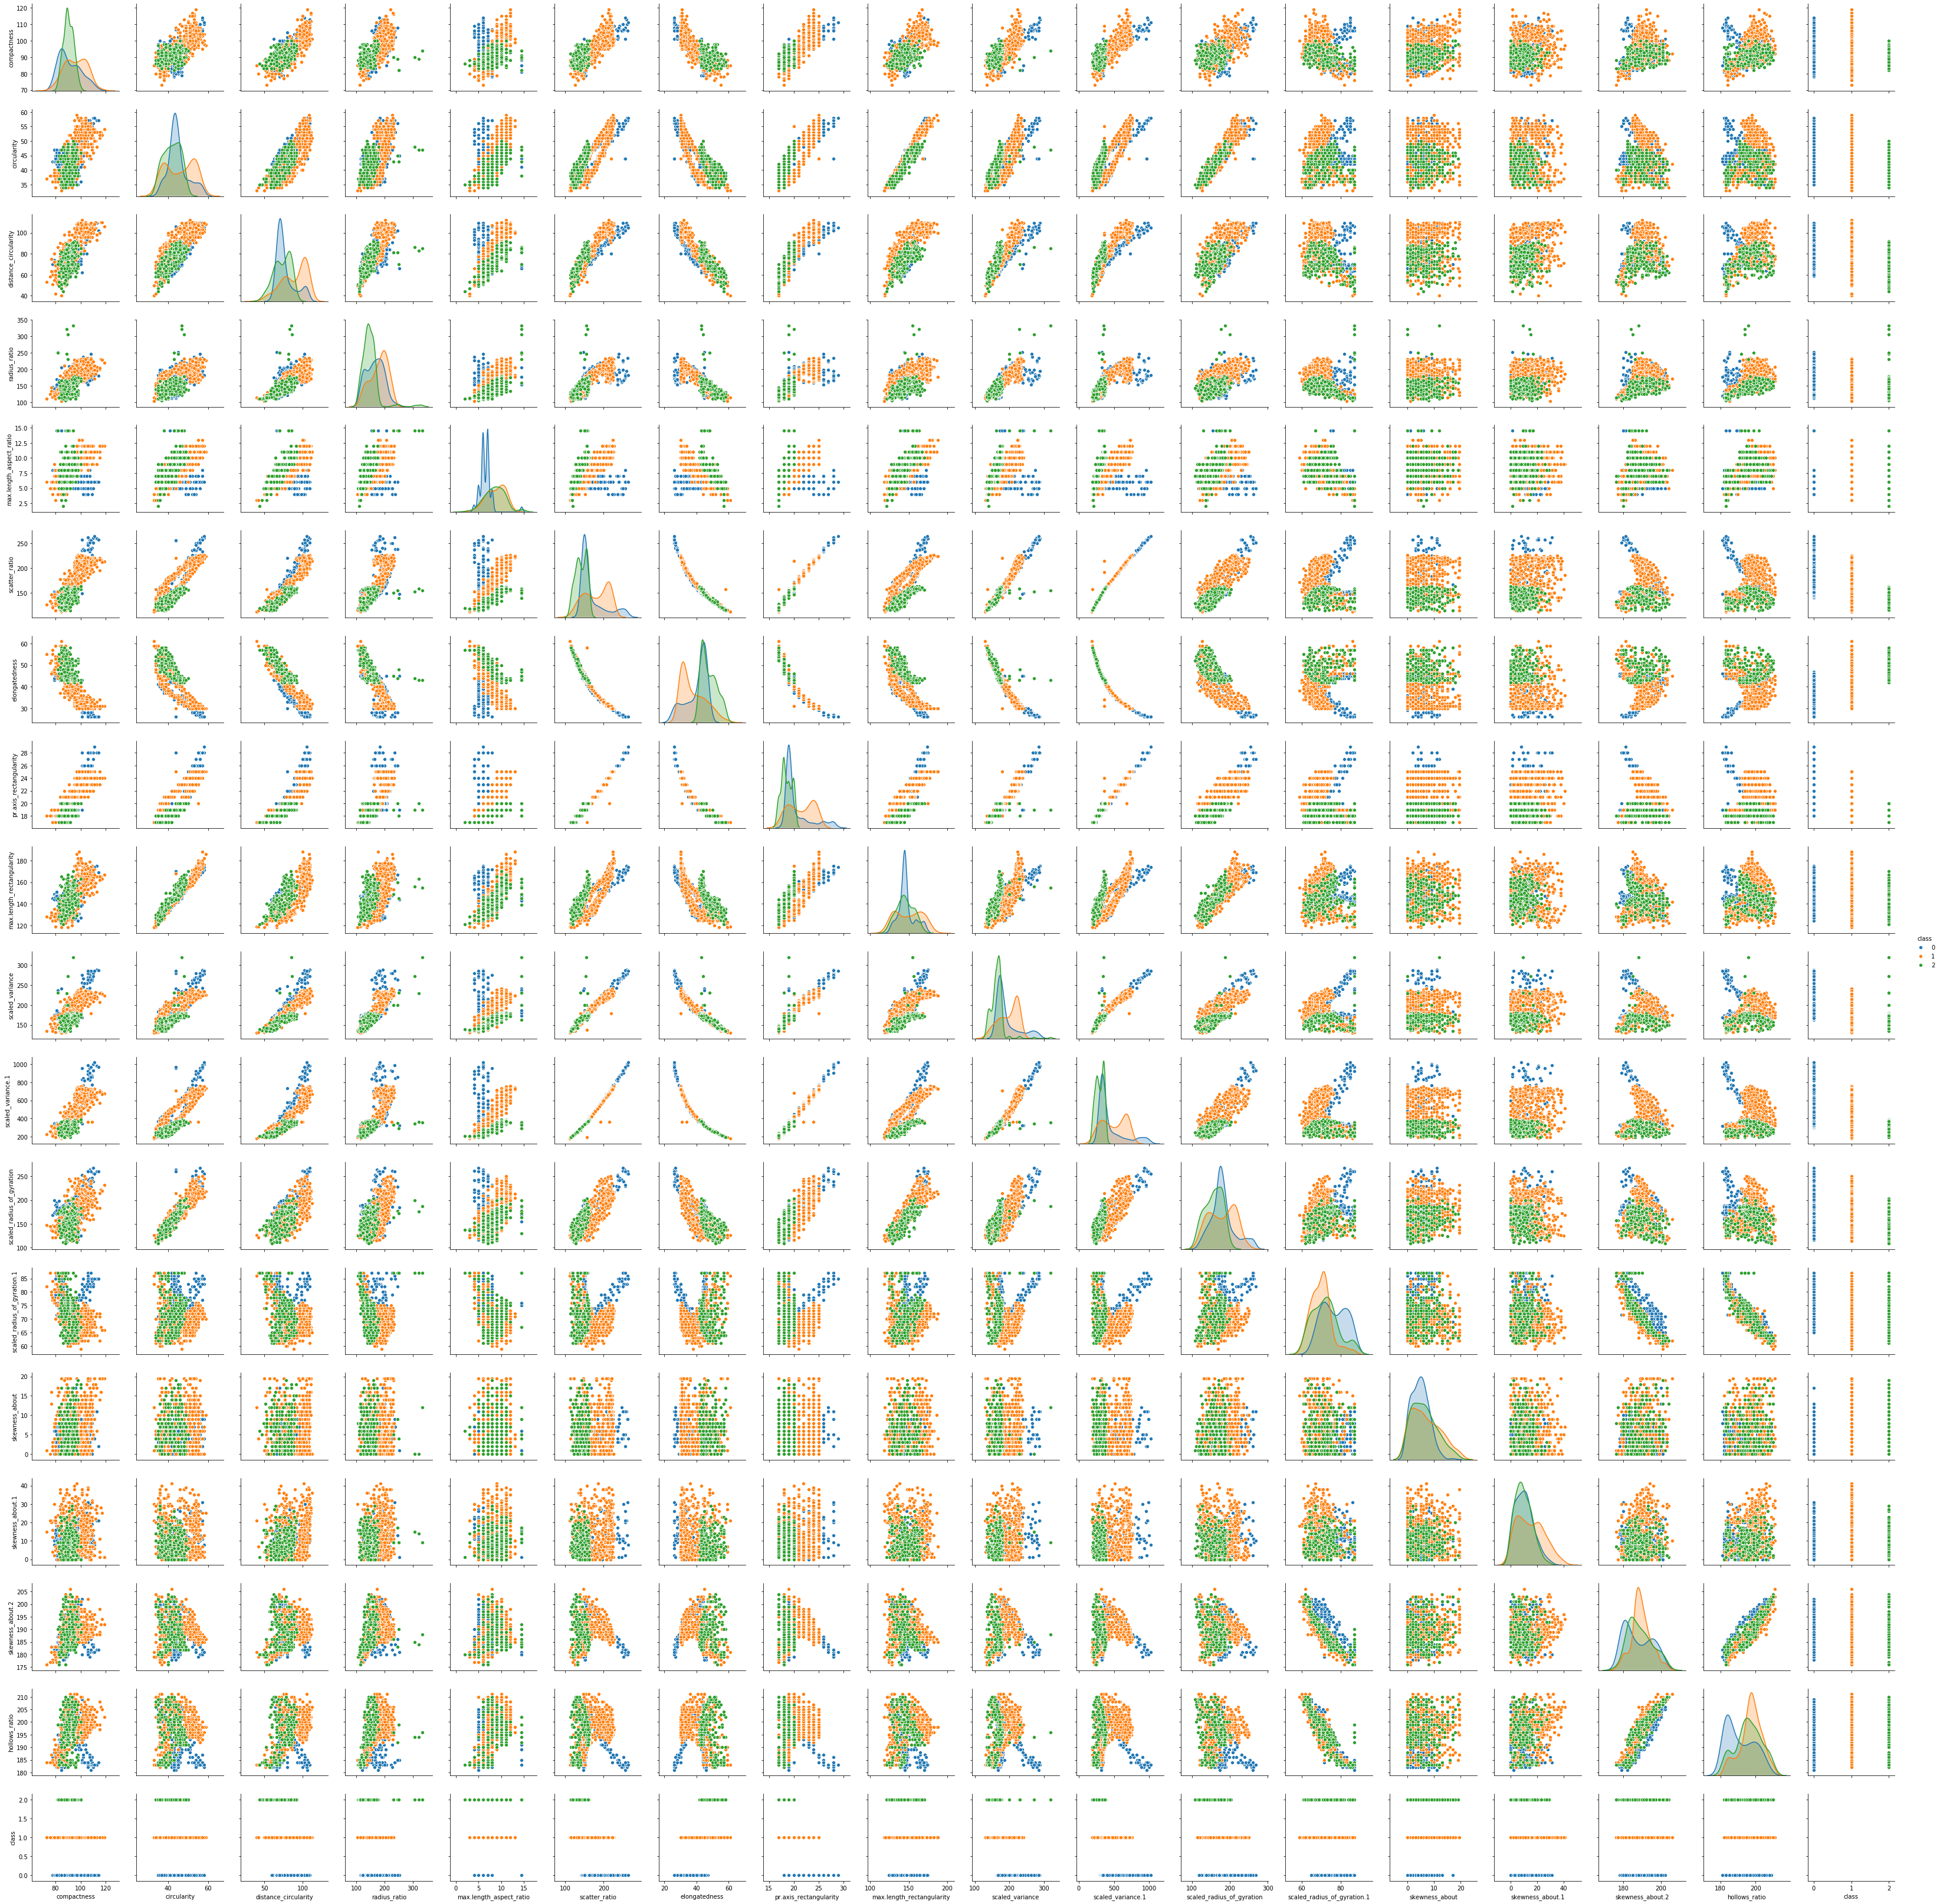

In [64]:
#Let us check for pair plot of new dataframe with relevant features only

sns.pairplot(vehicle_df, diag_kind='kde',hue = 'class') # plotting pairplot

In [65]:
#We see clusters within classes.
#Data still has  colinear features which will be fed to PCA

In [66]:
# Question 3 :
# Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [70]:
vehiclesdf_attr = vehicle_df.drop(labels = ["pr.axis_aspect_ratio","skewness_about.1","skewness_about","max.length_aspect_ratio"], axis = 1)
vehiclesdf_attr.shape

(846, 15)

In [71]:
#To find out the model accuracy post manually dropping least colinear features. 

#Standardising data before performaing PCA
vehiclesdf_attr = vehiclesdf_attr.drop("class",axis = 1) # dropping target variable
vehiclesdf_attr_std = StandardScaler().fit_transform(vehiclesdf_attr)

# Finding eigen values to plot elbow plot to find out number of Principal components 
#which contribute to more than 95% of the variance.

# Step 1 - Create covariance matrix
cov_matrix = np.cov(vehiclesdf_attr_std.T)

# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

#step 3 : find total eigen values & cumulative variance explained
tot = sum(eig_vals)
print("Total eigen values",tot)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

# Inference :
# first 7 PCs are contributing to more than 95% of variance in data.

Total eigen values 14.016568047337277
[65.90596746299201, 21.96458840725633, 4.155388691713274, 2.469765448546021, 1.8293538151231918, 1.202576497915397, 0.7969615440421861, 0.5216223391743217, 0.3791024880392731, 0.3005859185013172, 0.2254572419987538, 0.15295772312197395, 0.07310841429905605, 0.022564007276900205]
Cumulative Variance Explained [ 65.90596746  87.87055587  92.02594456  94.49571001  96.32506383
  97.52764032  98.32460187  98.84622421  99.22532669  99.52591261
  99.75136986  99.90432758  99.97743599 100.        ]


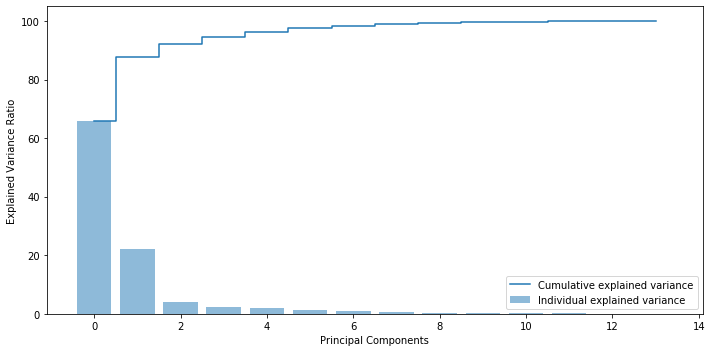

In [72]:
# plotting elbow plot
plt.figure(figsize=(10 ,5))
plt.bar(range(14), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(14), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Inference : 
# first 7 prinicipal components contributes to more than 95% of variance as mentioned in question #2.So, considering 7
# componenets only in further calculations.Number of features reduced from 14 to 7.

In [73]:
# using PCA to determine first set of principal components & map back to original data frame
from sklearn import decomposition
pca1 = decomposition.PCA(n_components=7)
pca1.fit(vehiclesdf_attr_std)
X = pca1.transform(vehiclesdf_attr_std)
vehiclesdf_pca1 = pd.DataFrame(X)
vehiclesdf_pca1.head(5) 
# This data frame has the original data points in terms of 7 principal components.

0         1         2         3         4         5         6
0  0.183067  0.055644 -1.068850  0.180395  0.042576  0.606917 -0.089659
1 -1.601825  0.403722 -0.241021 -0.388892 -0.313034  0.172089  0.142738
2  3.689374 -0.258254  0.259527  0.127897  0.029532  0.257813 -0.585304
3 -1.756420  2.946085 -0.365501 -0.408030 -0.107197  0.184973  0.530778
4 -0.722111 -2.946854  1.062933  2.263038  0.672365  0.477540 -0.154038

In [74]:
#Question 4 :
# Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and 
# find out the best hyper parameters and do cross validation to find the accuracy.

In [76]:
# Performing SVC & gridserach CV using first set of principal components.

#Split data in train & test
X1 = vehiclesdf_pca1
Y1 = vehicle_df["class"]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=1,stratify=Y1)

#Data standardisation using standard scalar
X1_train_scaled = StandardScaler().fit_transform(X1_train) 
X1_test_scaled = StandardScaler().fit_transform(X1_test)

In [78]:
# building SVC with gamma = scale + grid search CV with these parameters C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf.
svclassifier = SVC(gamma = "scale")     # SVC object
param_grid = {"C": [0.01, 0.05, 0.5, 1],"kernel": ["linear", "rbf"],} # defining parameters
gs1 = GridSearchCV(svclassifier, param_grid=param_grid, cv=10)
gs1.fit(X1_train_scaled, Y1_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
# finding best parameters from the above combination provided
gs1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [80]:
# list of all combinations tried in grid search
gs1.cv_results_['params'] 

[{'C': 0.01, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.05, 'kernel': 'linear'},
 {'C': 0.05, 'kernel': 'rbf'},
 {'C': 0.5, 'kernel': 'linear'},
 {'C': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'}]

In [81]:
gs1.cv_results_['mean_test_score'] # mean test scores of all models generated from above paramerts. 


array([0.84121622, 0.50675676, 0.86486486, 0.68412162, 0.86993243,
       0.93412162, 0.875     , 0.94425676])

We can see the last model with parameters - {'C': 1, 'kernel': 'rbf'} , has the highest accuracy around 90%

In [82]:
# result of the best estimator
gs1.best_estimator_ 


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
# using the gridsearched object on test data to see the model performance
Y1_pred = gs1.predict(X1_test_scaled) 
SVCgs_score_train_1 = gs1.score(X1_train_scaled,Y1_train)
print("Using first set of principal component : SVC_gs Accuracy score - train :", SVCgs_score_train_1)
SVCgs_score_test_1 = gs1.score(X1_test_scaled,Y1_test)
print("Using first set of principal component : SVC_gs Accuracy score - test :", SVCgs_score_test_1)
print("Using first set of principal component : svc_gs Confusion Matrix - test\n",metrics.confusion_matrix(Y1_test,Y1_pred))  
print(metrics.classification_report(Y1_test, Y1_pred))

Using first set of principal component : SVC_gs Accuracy score - train : 0.964527027027027
Using first set of principal component : SVC_gs Accuracy score - test : 0.9606299212598425
Using first set of principal component : svc_gs Confusion Matrix - test
 [[ 63   0   2]
 [  2 122   5]
 [  0   1  59]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.99      0.95      0.97       129
           2       0.89      0.98      0.94        60

    accuracy                           0.96       254
   macro avg       0.95      0.97      0.96       254
weighted avg       0.96      0.96      0.96       254



Inference - model accuracy above 95%.